In [ ]:
import pandas as pd
import numpy as np
#from datetime import datetime, timedelta

# Create a sample Dataframe
date_today = datetime.now()
days = pd.date_range(date_today, date_today + timedelta(7), freq='D')
close = pd.Series([1,2,3,4,2,1,4,3])
df = pd.DataFrame({"date":days, "prices":close})
df.set_index("date", inplace=True)
print("Original DF")
print(df)

# Long Explanation
updays = (df.diff()>0) # Show True for all updays false for all downdays
print("Updays df is")
print(updays)
reversal_df = (updays.diff()) # this will only show change days as True
reversal_df.dropna(axis=0, inplace=True) # Handle the first day
trade_df = df[reversal_df].dropna() # Select only the days where the trend reversed
print("These are the days where the trend reverses it self from negative to positive or vice versa ")
print(trade_df)

# Simplified below by combining the above into two lines
filter = (df.diff()>0).diff().dropna(axis=0)
new_df = df[filter].dropna(axis=0)
print("The final result is this: ")
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import parserprint(new_df)

                          ask        wn
2021-12-11 12:45:00  1.130000  0.000000
2021-12-11 12:50:00  1.130442  0.000442
2021-12-11 12:55:00  1.130839  0.000398
2021-12-11 13:00:00  1.130141 -0.000698
2021-12-11 13:05:00  1.129557 -0.000585


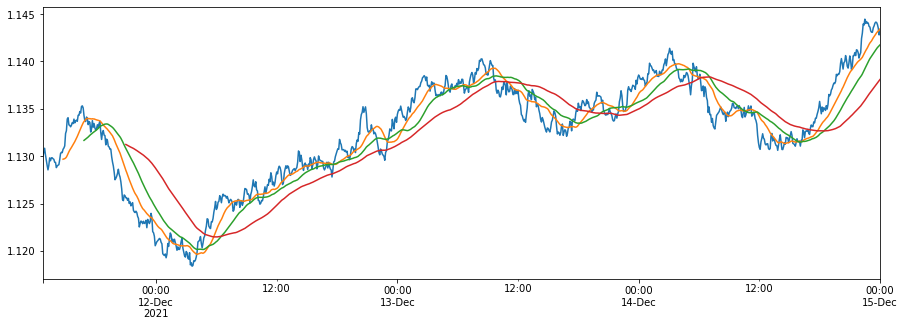

                       mva_25  m25_slp_sgn  m25_slp_chg
2021-12-11 22:50:00  1.124286         -1.0          0.0
2021-12-11 22:55:00  1.124169         -1.0          0.0
2021-12-11 23:00:00  1.124066         -1.0          0.0
2021-12-11 23:05:00  1.123940         -1.0          0.0
2021-12-11 23:10:00  1.123849         -1.0          0.0
2021-12-11 23:15:00  1.123760         -1.0          0.0
2021-12-11 23:20:00  1.123653         -1.0          0.0
2021-12-11 23:25:00  1.123577         -1.0          0.0
2021-12-11 23:30:00  1.123528         -1.0          0.0
2021-12-11 23:35:00  1.123480         -1.0          0.0
2021-12-11 23:40:00  1.123365         -1.0          0.0
2021-12-11 23:45:00  1.123238         -1.0          0.0
2021-12-11 23:50:00  1.123128         -1.0          0.0
2021-12-11 23:55:00  1.122985         -1.0          0.0
2021-12-12 00:00:00  1.122854         -1.0          0.0
2021-12-12 00:05:00  1.122725         -1.0          0.0
2021-12-12 00:10:00  1.122606         -1.0      

,ask,wn,mva_25,mva_50,mva_100,m25_slp_sgn,m50_slp_sgn,m100_slp_sgn,m25_slp_chg,m50_slp_chg,m100_slp_chg
2021-12-12 02:40:00,1.120302,-0.001042,1.120531,1.121363,1.124460,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2021-12-12 02:50:00,1.119491,-0.000420,1.120535,1.121232,1.124192,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2021-12-12 03:10:00,1.119217,-0.000587,1.120542,1.120953,1.123683,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2021-12-12 04:35:00,1.120329,-0.000483,1.119775,1.120153,1.121965,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2021-12-12 08:00:00,1.124834,-0.000285,1.125265,1.123637,1.121960,-1.0,1.0,1.0,-1.0,0.0,0.0


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# GENERATE DATA RANDOM PRICE

_periods = 1000
_value_0 = 1.1300
_std = 0.0005
_freq = '5T'
_output_col = 'ask'

_last_date = pd.to_datetime('2021-12-15')
_p_t = np.zeros(_periods)
_wn = np.random.normal(loc=0, scale=_std, size=_periods)
_p_t[0] = _value_0
_wn[0] = 0
_date_index = pd.date_range(end=_last_date, periods=_periods, freq=_freq)
df= pd.DataFrame(np.stack([_p_t, _wn], axis=1), columns=[_output_col, "wn"], index=_date_index)

for i in range(1, _periods):
    df.iloc[i][_output_col] = df.iloc[i - 1][_output_col] + df.iloc[i].wn

print(df.head(5))

# CALCULATE MOVING AVERAGES (3)

df['mva_25'] = df['ask'].rolling(25).mean()
df['mva_50'] = df['ask'].rolling(50).mean()
df['mva_100'] = df['ask'].rolling(100).mean()

# plot to check 

df['ask'].plot(figsize=(15,5))
df['mva_25'].plot(figsize=(15,5))
df['mva_50'].plot(figsize=(15,5))
df['mva_100'].plot(figsize=(15,5))
plt.show()

# *** THE SOLUTION BEGINS HERE ***

# calculate mva slopes directions
# positive slope: 1, negative slope -1
df['m25_slp_sgn'] = np.sign(df['mva_25'] - df['mva_25'].shift(1))
df['m50_slp_sgn'] = np.sign(df['mva_50'] - df['mva_50'].shift(1))
df['m100_slp_sgn'] = np.sign(df['mva_100'] - df['mva_100'].shift(1))


# CALCULATE CHANGE IN SLOPE

# from 1 to -1: -1
# from -1 to 1: 1

df['m25_slp_chg'] = np.sign(df['m25_slp_sgn'] - df['m25_slp_sgn'].shift(1))
df['m50_slp_chg'] = np.sign(df['m50_slp_sgn'] - df['m50_slp_sgn'].shift(1))
df['m100_slp_chg'] = np.sign(df['m100_slp_sgn'] -  df['m100_slp_sgn'].shift(1))

# clean NAN
df.dropna(inplace=True)

# print data to visually check
print(df.iloc[20:40][['mva_25', 'm25_slp_sgn', 'm25_slp_chg']])

# query where slope of MVA25 changes from positive to negative
df[(df['m25_slp_chg'] == -1)].head(5)

In [15]:
1 -- 1

2